<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#BCS" data-toc-modified-id="BCS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>BCS</a></span></li><li><span><a href="#VQD-Example" data-toc-modified-id="VQD-Example-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>VQD Example</a></span><ul class="toc-item"><li><span><a href="#Without-Noise" data-toc-modified-id="Without-Noise-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Without Noise</a></span></li><li><span><a href="#With-Noise" data-toc-modified-id="With-Noise-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>With Noise</a></span><ul class="toc-item"><li><span><a href="#Creating-the-noise-model" data-toc-modified-id="Creating-the-noise-model-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Creating the noise model</a></span></li><li><span><a href="#Running-the-algorithm" data-toc-modified-id="Running-the-algorithm-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Running the algorithm</a></span></li></ul></li></ul></li><li><span><a href="#Do-statistics" data-toc-modified-id="Do-statistics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Do statistics</a></span><ul class="toc-item"><li><span><a href="#Plots" data-toc-modified-id="Plots-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plots</a></span></li></ul></li></ul></div>

# BCS

Using the Paper by [Wu et al.](https://arxiv.org/abs/quant-ph/0108110), we have that:

The BCS hamiltonian is:

$$H_{BCS} = \sum_{m=1}^N \frac{\epsilon_m}{2} ( n_m^F + n_{-m}^F ) + \sum_{m,k=1}^N V^{+}_{ml} c^\dagger_m c^\dagger_{-m} c_{-l}c_l$$

Where $n_{\pm m}^F = c^\dagger_{\pm m} c_{\pm m}$, and the matrix elements $V^+_{ml} = \langle m, -m| V | l, -l \rangle$.

Which is mapped into:

$$H_P = \sum_{m=1}^N \frac{\epsilon_m}{2} \sigma^Z_m + \sum_{r= \pm l} \sum_{l>m=1}^N \frac{V_{ml}^r}{2} ( \sigma^x_m \sigma^x_l + r \sigma^y_m \sigma^y_l )$$

where $\epsilon_m = \epsilon_m + V^+_{mm}$ and $V^-_{ml} = 0$ for the BCS Hamiltonian, thus:

$$H_P = \sum_{m=1}^N \frac{\epsilon_m}{2} \sigma^Z_m +  \sum_{l>m=1}^N \frac{V_{ml}}{2} ( \sigma^x_m \sigma^x_l +  \sigma^y_m \sigma^y_l )$$

$l \ \mathrm{and} \ m$ now denote both state and qubit indices. In this case the qubit state space $H_P = Span \{ |0 \rangle, \sigma^+_m |0 \rangle, \sigma_l^+ \sigma_m^+ |0 \rangle, \dots   \}$ is mapped into a subspace where $n_m^F = n^F_{-m}$. Considering $V_{ml} = V$, we have that:

$$
H_p = \hbar \bigg[ \sum_{m=1}^N \frac{\epsilon_m}{2} \sigma_z^m + \frac{V}{2} \sum_{l>m=1}^N (\sigma_x^m \sigma_x^l + \sigma_y^m \sigma_y^l) \bigg]
$$

This leads to a spectrum of $E_0^{\pm} = \pm(\epsilon_0 + \epsilon_1)/2$, $E_1^{\pm} = \pm \sqrt{\epsilon^2 + 4V^2}/2$, where $\epsilon^2 = (\epsilon_0 - \epsilon_1)^2$.
The eigenvalues are calculated in this [notebook](https://colab.research.google.com/drive/18IyDfCYlMx957260MSwvJtUeTcAJFnza?usp=sharing):

[Aqua Operator Flow Reference](https://github.com/dongreenberg/aqua_talks/blob/master/Understanding%20Aqua's%20Operator%20Flow.ipynb)

In [1]:
import sys
sys.path.append('../../')

# Python imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Qiskit
from qiskit import BasicAer
from qiskit.aqua.components.optimizers import COBYLA, SPSA, L_BFGS_B
from qiskit.circuit.library import TwoLocal

# VOLTA
from volta.vqd import VQD
from volta.utils import classical_solver
from volta.hamiltonians import BCS_hamiltonian

%load_ext autoreload
%autoreload 2

/home/nahum/anaconda3/lib/python3.6/site-packages/qiskit/__init__.py:67: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of the 0.17.0 release. Support for running Qiskit with Python 3.6 will be removed in a future release.
  DeprecationWarning,
/home/nahum/anaconda3/lib/python3.6/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


In [8]:
EPSILONS = [3, 3]
V = -2
hamiltonian = BCS_hamiltonian(EPSILONS, V)
print(f"Hamiltonian: {hamiltonian}\n")
eigenvalues, eigenvectors = classical_solver(hamiltonian)
print(f"Eigenvalues: {eigenvalues}")

Hamiltonian: SummedOp([
  1.5 * ZI,
  1.5 * IZ,
  -1.0 * XX,
  -1.0 * YY
])

Eigenvalues: [-3. -2.  2.  3.]


In [9]:
from itertools import product
# Get the ideal count
ideal_dict = {}

bin_combinations = list(product(['0','1'], repeat=hamiltonian.num_qubits))
for i, eigvect in enumerate(np.abs(eigenvectors)**2):
    dic = {}
    for ind, val in enumerate(bin_combinations):
        val = ''.join(val)
        dic[val] = eigvect[ind]
    ideal_dict[i] = dic

# VQD Example

## Without Noise

In [ ]:
from qiskit.aqua import QuantumInstance

# Define Optimizer
# optimizer = COBYLA()
optimizer = SPSA(maxiter=250, c1=.7, last_avg=25)
# optimizer = L_BFGS_B()

# Define Backend
# backend = BasicAer.get_backend('qasm_simulator')
backend = QuantumInstance(backend=BasicAer.get_backend('qasm_simulator'),
                          shots=10000)

# Define ansatz
ansatz = TwoLocal(hamiltonian.num_qubits, ['ry','rz'], 'cx', reps=3)

# Run algorithm
Algo = VQD(hamiltonian=hamiltonian,
            ansatz=ansatz,
            n_excited_states=3,
            beta=10.,
            optimizer=optimizer,
            backend=backend)

Algo.run()      
vqd_energies = Algo.energies
vqd_states = Algo.states

In [ ]:
from copy import copy
# Create states and measure them
states = []
for ind, state in enumerate(vqd_states):
    states.append(copy(state))
    states[ind].measure_all()

In [ ]:
from qiskit import execute
from qiskit.visualization import plot_histogram



fig, axs = plt.subplots(2, 2, figsize=(30,15))

for i, ax in zip(range(len(states)), axs.flat):
    count = execute(states[i], backend=backend, shots=10000).result().get_counts()
    plot_histogram([ideal_dict[i], count],legend=['Ideal','Result'], ax=ax)

In [ ]:
print(f'Ideal eigenvalues: {eigenvalues}')
print(f'Obtained eigenvalues: {vqd_energies}')

In [ ]:
n_1_sim, n_2_sim = 1, 2
n_1_vqd, n_2_vqd = 1, 2
print(f"Gap Exact: {(eigenvalues[n_2_sim] - eigenvalues[n_1_sim])/2}")
print(f"Gap VQD: {(vqd_energies[n_2_vqd] - vqd_energies[n_1_vqd])/2}")

## With Noise

### Creating the noise model

Thermal relaxation constant $T_1$ and dephasing constant $T_2^*$.

In [10]:
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error
from qiskit.providers.aer.noise import NoiseModel

In [34]:
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error
from qiskit.providers.aer.noise import NoiseModel

# T1 and T2 values for qubits 0-n
n_qubits = 4
T1s = np.random.normal(50e3, 10e3, n_qubits) # Sampled from normal distribution mean 50 microsec
T2s = np.random.normal(70e3, 10e3, n_qubits)  # Sampled from normal distribution mean 50 microsec

T1s = [30e3]*n_qubits
T2s = [20e3]*n_qubits

# Truncate random T2s <= T1s
T2s = np.array([min(T2s[j], 2 * T1s[j]) for j in range(n_qubits)])

# Instruction times (in nanoseconds)
time_u1 = 0   # virtual gate
time_u2 = 50  # (single X90 pulse)
time_u3 = 100 # (two X90 pulses)
time_cx = 300
time_reset = 1000  # 1 microsecond
time_measure = 1000 # 1 microsecond

# QuantumError objects
errors_reset = [thermal_relaxation_error(t1, t2, time_reset)
                for t1, t2 in zip(T1s, T2s)]
errors_measure = [thermal_relaxation_error(t1, t2, time_measure)
                  for t1, t2 in zip(T1s, T2s)]
errors_u1  = [thermal_relaxation_error(t1, t2, time_u1)
              for t1, t2 in zip(T1s, T2s)]
errors_u2  = [thermal_relaxation_error(t1, t2, time_u2)
              for t1, t2 in zip(T1s, T2s)]
errors_u3  = [thermal_relaxation_error(t1, t2, time_u3)
              for t1, t2 in zip(T1s, T2s)]
errors_cx = [[thermal_relaxation_error(t1a, t2a, time_cx).expand(
             thermal_relaxation_error(t1b, t2b, time_cx))
              for t1a, t2a in zip(T1s, T2s)]
               for t1b, t2b in zip(T1s, T2s)]

# Add errors to noise model
noise_thermal = NoiseModel()

for j in range(n_qubits):
    noise_thermal.add_quantum_error(errors_reset[j], "reset", [j])
    noise_thermal.add_quantum_error(errors_measure[j], "measure", [j])
    noise_thermal.add_quantum_error(errors_u1[j], "u1", [j])
    noise_thermal.add_quantum_error(errors_u2[j], "u2", [j])
    noise_thermal.add_quantum_error(errors_u3[j], "u3", [j])
    for k in range(n_qubits):
        noise_thermal.add_quantum_error(errors_cx[j][k], "cx", [j, k])

print(noise_thermal)

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u2', 'cx', 'measure', 'reset', 'u3']
  Qubits with noise: [0, 1, 2, 3]
  Specific qubit errors: [('reset', [0]), ('reset', [1]), ('reset', [2]), ('reset', [3]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('u2', [0]), ('u2', [1]), ('u2', [2]), ('u2', [3]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('u3', [3]), ('cx', [0, 0]), ('cx', [0, 1]), ('cx', [0, 2]), ('cx', [0, 3]), ('cx', [1, 0]), ('cx', [1, 1]), ('cx', [1, 2]), ('cx', [1, 3]), ('cx', [2, 0]), ('cx', [2, 1]), ('cx', [2, 2]), ('cx', [2, 3]), ('cx', [3, 0]), ('cx', [3, 1]), ('cx', [3, 2]), ('cx', [3, 3])]


### Running the algorithm

In [13]:
from qiskit.aqua import QuantumInstance
from qiskit import Aer

# Define Optimizer
# optimizer = COBYLA()
optimizer = SPSA(maxiter=250, c1=.7, last_avg=25)

# Define Backend
backend = QuantumInstance(backend=Aer.get_backend('qasm_simulator'),
                          noise_model=noise_thermal,
                          shots=10000)

# Define ansatz
ansatz = TwoLocal(hamiltonian.num_qubits, ['ry','rz'], 'cx', reps=3)

# Run algorithm
Algo = VQD(hamiltonian=hamiltonian,
            ansatz=ansatz,
            n_excited_states=3,
            beta=10.,
            optimizer=optimizer,
            backend=backend)

Algo.run()      
vqd_energies = Algo.energies
vqd_states = Algo.states

Calculating excited state 0
Calculating excited state 1
Calculating excited state 2
Calculating excited state 3


In [14]:
from copy import copy
# Create states and measure them
states = []
for ind, state in enumerate(vqd_states):
    states.append(copy(state))
    states[ind].measure_all()

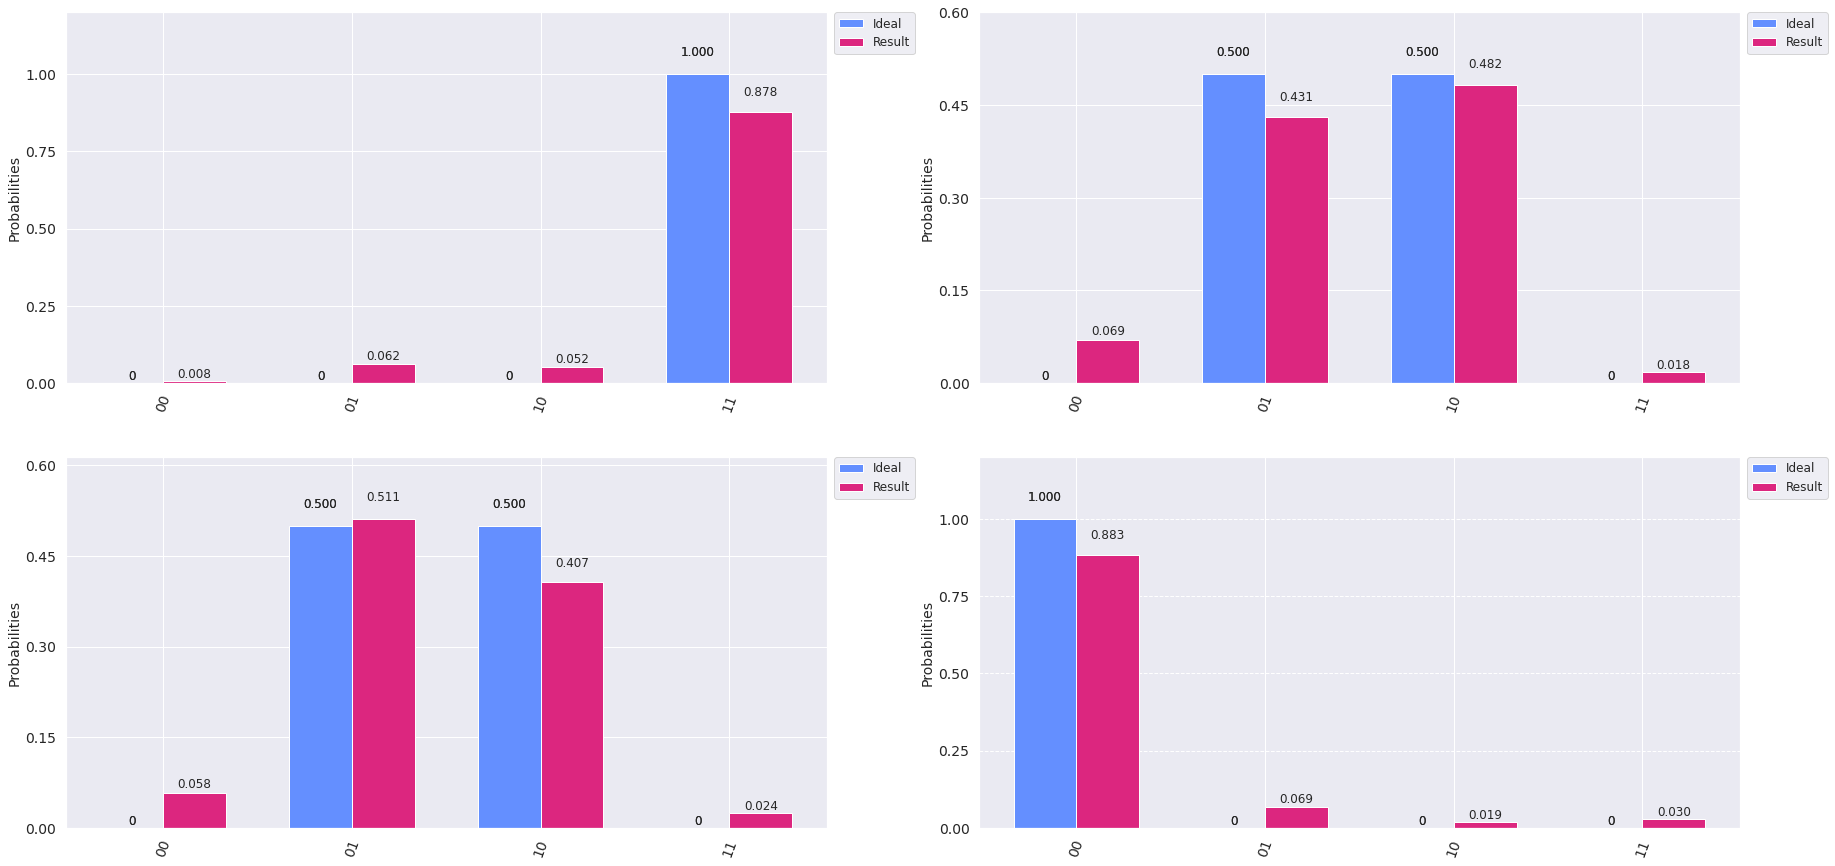

In [35]:
from qiskit import execute
from qiskit.visualization import plot_histogram

import seaborn as sns
sns.set()

fig, axs = plt.subplots(2, 2, figsize=(30,15))

backend = QuantumInstance(backend=Aer.get_backend('qasm_simulator'),
                          noise_model=noise_thermal,
                          shots=10000)

for i, ax in zip(range(len(states)), axs.flat):
    count = backend.execute(states[i]).get_counts()
    plot_histogram([ideal_dict[i], count],legend=['Ideal','Result'], ax=ax)


In [24]:
print(f'Ideal eigenvalues: {eigenvalues}')
print(f'Obtained eigenvalues: {vqd_energies}')

Ideal eigenvalues: [-3. -2.  2.  3.]
Obtained eigenvalues: [-2.91044870110064, -1.360832647934979, 2.6843205753260877, 4.0395452305270965]


In [25]:
n_1_sim, n_2_sim = 1, 2
n_1_vqd, n_2_vqd = 1, 2
print(f"Gap Exact: {(eigenvalues[n_2_sim] - eigenvalues[n_1_sim])/2}")
print(f"Gap VQD: {(vqd_energies[n_2_vqd] - vqd_energies[n_1_vqd])/2}")

Gap Exact: 2.0
Gap VQD: 2.0225766116305333


# Do statistics

In [87]:
from tqdm import tqdm
from qiskit.aqua import QuantumInstance

es_1 = []
es_2 = []

n = 50

for _ in tqdm(range(n)):
    # Define Optimizer
    optimizer = COBYLA()

    # Define Backend
    # backend = BasicAer.get_backend('qasm_simulator')
    backend = QuantumInstance(backend=BasicAer.get_backend('qasm_simulator'),
                              shots=10000)

    # Define ansatz
    ansatz = TwoLocal(hamiltonian.num_qubits, ['ry','rz'], 'cx', reps=2)

    # Run algorithm
    Algo = VQD(hamiltonian=hamiltonian,
                ansatz=ansatz,
                n_excited_states=2,
                beta=10.,
                optimizer=optimizer,
                backend=backend)

    Algo.run(0)      
    vqd_energies = Algo.energies
    es_1.append(vqd_energies[1])
    es_2.append(vqd_energies[2])

100%|██████████| 50/50 [2:15:41<00:00, 144.26s/it]  


In [88]:
np.savetxt("groundstate.txt", es_1)
np.savetxt("excitedstate.txt", es_2)

In [89]:
print(f"Ground State: {np.round(np.mean(es_1),3)} +/- {np.round(np.std(es_1),3)} | Expected: {eigenvalues[1]}")
print(f"Excited State: {np.round(np.mean(es_2),3)} +/- {np.round(np.std(es_2),3)} | Expected: {eigenvalues[2]}")

Ground State: -1.807 +/- 0.324 | Expected: -2.0
Excited State: 2.443 +/- 0.424 | Expected: 2.0


In [90]:
np.round(np.mean(es_2) - np.mean(es_1), 3)/2

2.1245

## Plots

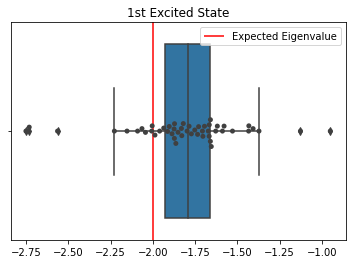

In [94]:
import seaborn as sns

sns.boxplot(x=es_1)
ax=sns.swarmplot(x=es_1, color="0.25")
ax.set_title("1st Excited State")
ax.vlines(x=eigenvalues[1], ymin=-10, ymax=10, label='Expected Eigenvalue',color='r')
plt.legend()
plt.show()

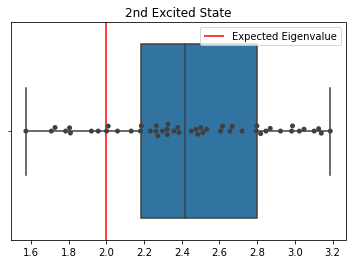

In [92]:
sns.boxplot(x=es_2)
ax=sns.swarmplot(x=es_2, color="0.25")
ax.set_title("2nd Excited State")
ax.vlines(x=eigenvalues[2], ymin=-10, ymax=10, label='Expected Eigenvalue',color='r')
plt.legend()
plt.show()

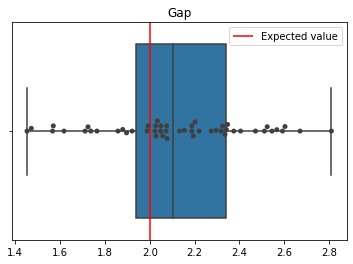

In [93]:
sns.boxplot(x=(np.array(es_2)- np.array(es_1))/2)
ax=sns.swarmplot(x=(np.array(es_2)- np.array(es_1))/2, color="0.25")
ax.set_title("Gap")
ax.vlines(x=(eigenvalues[2] - eigenvalues[1])/2, ymin=-10, ymax=10, label='Expected value',color='r')
plt.legend()
plt.show()